Importando librerias a usar

In [1]:
import numpy as np
import pandas as pd
from pandas import factorize
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline  



Ahora leemos el archivo con los datos que limpiearemos

In [4]:
df=pd.read_csv("DBs/vgsales.csv")
datanum = []


print(df)
df.head()

        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                           Pokemon Red/Pokemon Blue       GB   
5          6                                             Tetris       GB   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
8          9                          New Super Mario Bros. Wii      Wii   
9         10                                          Duck Hunt      NES   
10        11                                         Nintendogs       DS   
11        12                                      Mario Kart DS       DS   
12        13

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


A continuacion borrare cuatro columnas las cuales no son relevantes 
en este analisis. En este analisis solo veremos el comportamiento 
de los datos de ventas en Norte America

In [5]:
#Borramos las colummnas de las ventas que no son de NA
del df['EU_Sales']
del df['Global_Sales']
del df['Other_Sales']
del df['JP_Sales']
print (df)
df.head()

        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                           Pokemon Red/Pokemon Blue       GB   
5          6                                             Tetris       GB   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
8          9                          New Super Mario Bros. Wii      Wii   
9         10                                          Duck Hunt      NES   
10        11                                         Nintendogs       DS   
11        12                                      Mario Kart DS       DS   
12        13

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27


Ahora como los datos incluyen juegos no vendidos en Norte America, borrare todos
estos elemento que no se deberian tomar en cuenta en el analisis

In [6]:

df.loc[df['NA_Sales'] == 0,'NA_Sales'] = np.nan
n = df.shape[0]
print ('Porcentaje de datos con valores faltantes')
print((n - df.count())/n*100 )

Porcentaje de datos con valores faltantes
Rank          0.000000
Name          0.000000
Platform      0.000000
Year          1.632727
Genre         0.000000
Publisher     0.349440
NA_Sales     27.105675
dtype: float64


        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                           Pokemon Red/Pokemon Blue       GB   
5          6                                             Tetris       GB   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
8          9                          New Super Mario Bros. Wii      Wii   
9         10                                          Duck Hunt      NES   
10        11                                         Nintendogs       DS   
11        12                                      Mario Kart DS       DS   
12        13

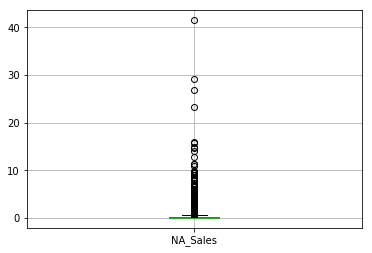

In [5]:
print(df)
print(df.describe())
df.boxplot(column='NA_Sales')
plt.show()

In [6]:
#Eliminamos los renglones donde las NA_Sales=0.00 ya que esto significa que
#el juego no se vendio en la region.
#df = df[df.NA_Sales != 0.00]
df = df.dropna()
print (df.describe())
print (df)

               Rank          Year      NA_Sales
count  11861.000000  11861.000000  11861.000000
mean    7008.533935   2006.052525      0.364864
std     4434.267437      5.590225      0.944902
min        1.000000   1980.000000      0.010000
25%     3159.000000   2003.000000      0.060000
50%     6694.000000   2007.000000      0.140000
75%    10549.000000   2010.000000      0.350000
max    16600.000000   2020.000000     41.490000
        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                           Pokemon Red/Pokemon Blue       GB   
5          6                                             Tetris       GB   
6          7                        

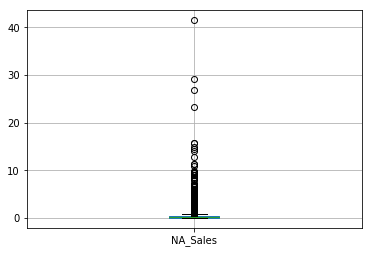

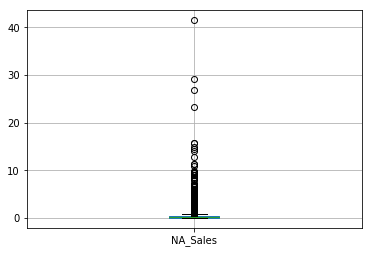

,Rank,Year,NA_Sales
Rank,1.000000,0.178814,-0.406506
Year,0.178814,1.000000,-0.089379
NA_Sales,-0.406506,-0.089379,1.000000


In [24]:
#print(df)
#print(df.describe())
df.boxplot(column='NA_Sales')
plt.show()

df.boxplot(column=['NA_Sales'])
plt.show()
                   
df.corr()

En las proximas lineas separaremos los dataframes por Platform para poder evaluar si vendieron o no los 
juegos dependiendo de el Platform para el cual salieron

In [11]:
df_wii = df[df.Platform == 'Wii']
df_nes = df[df.Platform == 'NES']
df_gb = df[df.Platform == 'GB']
df_ds = df[df.Platform == 'DS']
df_x360 = df[df.Platform == 'X360']
df_ps4 = df[df.Platform == 'PS4']
df_ps3 = df[df.Platform == 'PS3']
df_ps2 = df[df.Platform == 'PS2']
df_ps = df[df.Platform == 'PS']
df_psp = df[df.Platform == 'PSP']
df_psv = df[df.Platform == 'PSV']
df_snes = df[df.Platform == 'SNES']
df_gba = df[df.Platform == 'GBA']
df_3ds = df[df.Platform == '3DS']
df_n64 = df[df.Platform == 'N64']
df_xb = df[df.Platform == 'XB']
df_pc = df[df.Platform == 'PC']
df_2600 = df[df.Platform == '2600']
df_wiiu = df[df.Platform == 'WiiU']
df_xone = df[df.Platform == 'XOne']
df_gc = df[df.Platform == 'GC']
df_gen = df[df.Platform == 'GEN']
df_dc = df[df.Platform == 'DC']
df_sat = df[df.Platform == 'SAT']
df_scd = df[df.Platform == 'SCD']

Ya que los dataframes estan separados categorizaremos si un juego fue exitoso o no usando su numero de ventas
y la media de ventas de la consola. Es decir si las ventas de un juego son igualoes o mayores a la media de ventas de juegos en esa consola entonces el juego es exitoso(1), de los contrario no es exitoso (0).

Despues vamos a imprimir estos DataFrames para ver como quedo la informacion

               Rank         Year     NA_Sales        Exito
count   1325.000000  1290.000000  1148.000000  1325.000000
mean    7730.774340  2008.962791     0.442256     0.177358
std     4483.478698     1.532734     1.641018     0.382116
min        1.000000  2006.000000     0.010000     0.000000
25%     4037.000000  2008.000000     0.080000     0.000000
50%     7569.000000  2009.000000     0.170000     0.000000
75%    11209.000000  2010.000000     0.380000     0.000000
max    16584.000000  2015.000000    41.490000     1.000000
Wii


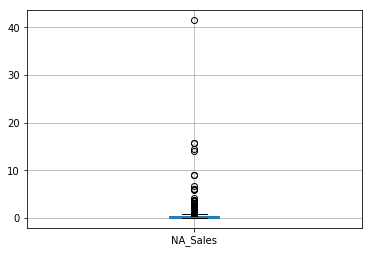

In [15]:
#print (df_wii)
mean_ventas = df_wii['NA_Sales'].mean()
#print (mean_ventas)
#print (df_wii.describe())

ventas = []
for i in df_wii['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)
#df['imdb_score'] = array
#datanums.append(array)
df_wii = df_wii.assign(Exito=ventas)

#print (df_wii)
print (df_wii.describe())
#df_wii.head()
print('Wii')
df_wii.boxplot(column='NA_Sales')
plt.show()


               Rank         Year   NA_Sales      Exito
count     98.000000    98.000000  75.000000  98.000000
mean    1906.438776  1987.153061   1.679200   0.132653
std     2163.714361     2.793040   4.599542   0.340943
min        2.000000  1983.000000   0.010000   0.000000
25%      727.750000  1985.000000   0.280000   0.000000
50%     1412.500000  1986.500000   0.530000   0.000000
75%     2062.500000  1989.000000   1.090000   0.000000
max    12638.000000  1994.000000  29.080000   1.000000
NES


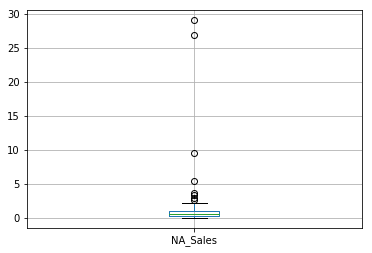

In [14]:
#print (df_nes)
#print (df_nes.describe())

ventas = []
mean_ventas = df_nes['NA_Sales'].mean()
for i in df_nes['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_nes = df_nes.assign(Exito=ventas)

#print (df_nes)
print (df_nes.describe())
#df_nes.head()
print('NES')
df_nes.boxplot(column='NA_Sales')
plt.show()

               Rank         Year   NA_Sales
count     98.000000    97.000000  46.000000
mean    3392.030612  1995.958763   2.485217
std     3416.965832     4.178111   4.036494
min        5.000000  1988.000000   0.290000
25%      755.250000  1992.000000   0.712500
50%     1742.000000  1997.000000   0.950000
75%     5802.000000  2000.000000   2.202500
max    12672.000000  2001.000000  23.200000
               Rank         Year   NA_Sales      Exito
count     98.000000    97.000000  46.000000  98.000000
mean    3392.030612  1995.958763   2.485217   0.112245
std     3416.965832     4.178111   4.036494   0.317290
min        5.000000  1988.000000   0.290000   0.000000
25%      755.250000  1992.000000   0.712500   0.000000
50%     1742.000000  1997.000000   0.950000   0.000000
75%     5802.000000  2000.000000   2.202500   0.000000
max    12672.000000  2001.000000  23.200000   1.000000
GB


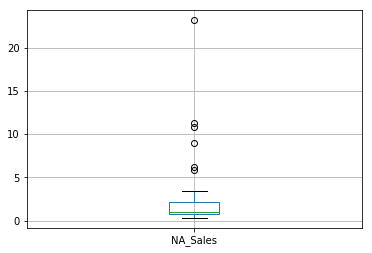

In [16]:
print (df_gb.describe())

ventas = []
mean_ventas = df_gb['NA_Sales'].mean()
for i in df_gb['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_gb = df_gb.assign(Exito=ventas)

#print (df_gb)
print (df_gb.describe())
#df_gb.head()
print('GB')
df_gb.boxplot(column='NA_Sales')
plt.show()

               Rank         Year     NA_Sales
count   2163.000000  2133.000000  1531.000000
mean    9637.462321  2008.201125     0.255199
std     4409.260922     1.805339     0.624424
min        7.000000  1985.000000     0.010000
25%     6237.000000  2007.000000     0.060000
50%    10306.000000  2008.000000     0.110000
75%    13192.000000  2009.000000     0.260000
max    16599.000000  2020.000000    11.380000
               Rank         Year     NA_Sales        Exito
count   2163.000000  2133.000000  1531.000000  2163.000000
mean    9637.462321  2008.201125     0.255199     0.177994
std     4409.260922     1.805339     0.624424     0.382596
min        7.000000  1985.000000     0.010000     0.000000
25%     6237.000000  2007.000000     0.060000     0.000000
50%    10306.000000  2008.000000     0.110000     0.000000
75%    13192.000000  2009.000000     0.260000     0.000000
max    16599.000000  2020.000000    11.380000     1.000000
DS


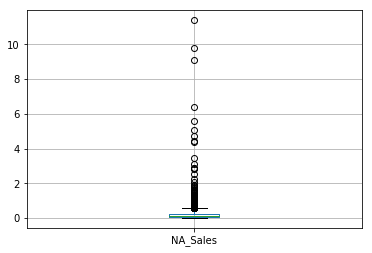

In [17]:
print (df_ds.describe())

ventas = []
mean_ventas = df_ds['NA_Sales'].mean()
for i in df_ds['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_ds = df_ds.assign(Exito=ventas)

#print (df_ds)
print (df_ds.describe())
#df_ds.head()
print('DS')
df_ds.boxplot(column='NA_Sales')
plt.show()

               Rank         Year     NA_Sales
count   1265.000000  1235.000000  1138.000000
mean    6692.528063  2009.882591     0.528163
std     4554.911300     2.451800     1.074607
min       16.000000  2005.000000     0.010000
25%     2661.000000  2008.000000     0.100000
50%     6107.000000  2010.000000     0.200000
75%    10125.000000  2011.000000     0.510000
max    16556.000000  2016.000000    14.970000
               Rank         Year     NA_Sales        Exito
count   1265.000000  1235.000000  1138.000000  1265.000000
mean    6692.528063  2009.882591     0.528163     0.215810
std     4554.911300     2.451800     1.074607     0.411546
min       16.000000  2005.000000     0.010000     0.000000
25%     2661.000000  2008.000000     0.100000     0.000000
50%     6107.000000  2010.000000     0.200000     0.000000
75%    10125.000000  2011.000000     0.510000     0.000000
max    16556.000000  2016.000000    14.970000     1.000000
X360


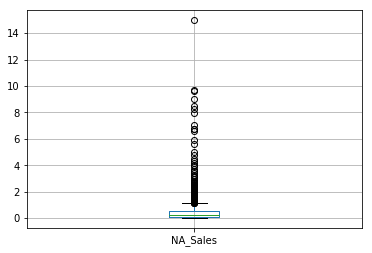

In [18]:
print (df_x360.describe())
ventas = []
mean_ventas = df_x360['NA_Sales'].mean()
for i in df_x360['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_x360 = df_x360.assign(Exito=ventas)

#print (df_x360)
print (df_x360.describe())
#df_x360.head()
print('X360')
df_x360.boxplot(column='NA_Sales')
plt.show()

               Rank         Year    NA_Sales
count    336.000000   336.000000  245.000000
mean    7625.562500  2015.005952    0.395102
std     5251.880153     0.863848    0.664997
min       34.000000  2013.000000    0.010000
25%     2526.500000  2014.000000    0.050000
50%     7302.500000  2015.000000    0.130000
75%    12657.250000  2016.000000    0.460000
max    16573.000000  2017.000000    5.770000
               Rank         Year    NA_Sales       Exito
count    336.000000   336.000000  245.000000  336.000000
mean    7625.562500  2015.005952    0.395102    0.199405
std     5251.880153     0.863848    0.664997    0.400149
min       34.000000  2013.000000    0.010000    0.000000
25%     2526.500000  2014.000000    0.050000    0.000000
50%     7302.500000  2015.000000    0.130000    0.000000
75%    12657.250000  2016.000000    0.460000    0.000000
max    16573.000000  2017.000000    5.770000    1.000000
PS4


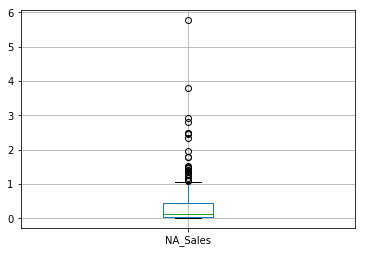

In [19]:
print (df_ps4.describe())
ventas = []
mean_ventas = df_ps4['NA_Sales'].mean()
for i in df_ps4['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_ps4 = df_ps4.assign(Exito=ventas)

#print (df_ps4)
print (df_ps4.describe())
#df_ps4.head()
print('PS4')
df_ps4.boxplot(column='NA_Sales')
plt.show()

               Rank         Year     NA_Sales
count   1329.000000  1304.000000  1001.000000
mean    6793.054929  2010.819785     0.391868
std     4692.078022     2.441118     0.637358
min       17.000000  2006.000000     0.010000
25%     2668.000000  2009.000000     0.090000
50%     6137.000000  2011.000000     0.190000
75%    10367.000000  2013.000000     0.420000
max    16544.000000  2016.000000     7.010000
               Rank         Year     NA_Sales        Exito
count   1329.000000  1304.000000  1001.000000  1329.000000
mean    6793.054929  2010.819785     0.391868     0.201655
std     4692.078022     2.441118     0.637358     0.401387
min       17.000000  2006.000000     0.010000     0.000000
25%     2668.000000  2009.000000     0.090000     0.000000
50%     6137.000000  2011.000000     0.190000     0.000000
75%    10367.000000  2013.000000     0.420000     0.000000
max    16544.000000  2016.000000     7.010000     1.000000
PS3


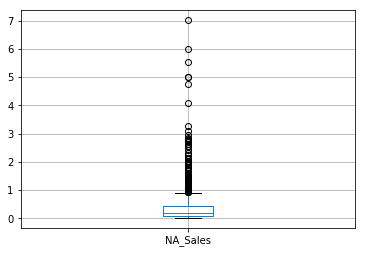

In [20]:
print (df_ps3.describe())
ventas = []
mean_ventas = df_ps3['NA_Sales'].mean()
for i in df_ps3['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_ps3 = df_ps3.assign(Exito=ventas)

#print (df_ps3)
print (df_ps3.describe())
#df_ps3.head()
print('PS3')
df_ps3.boxplot(column='NA_Sales')
plt.show()

In [16]:
print (df_ps2.describe())
ventas = []
mean_ventas = df_ps2['NA_Sales'].mean()
for i in df_ps2['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_ps2 = df_ps2.assign(Exito=ventas)

print (df_ps2)
print (df_ps2.describe())
df_ps2.head()

               Rank         Year     NA_Sales
count   1620.000000  1620.000000  1620.000000
mean    6183.337654  2004.181481     0.353654
std     4089.997007     2.418357     0.637956
min       18.000000  2000.000000     0.010000
25%     2819.000000  2002.000000     0.060000
50%     5511.500000  2004.000000     0.140000
75%     9106.250000  2006.000000     0.350000
max    16492.000000  2011.000000     9.430000
        Rank                                           Name Platform    Year  \
17        18                  Grand Theft Auto: San Andreas      PS2  2004.0   
24        25                    Grand Theft Auto: Vice City      PS2  2002.0   
28        29                         Gran Turismo 3: A-Spec      PS2  2001.0   
38        39                           Grand Theft Auto III      PS2  2001.0   
47        48                                 Gran Turismo 4      PS2  2004.0   
86        87                                Final Fantasy X      PS2  2001.0   
104      105              

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,1
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,1
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,1
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,1
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,1


In [17]:
print (df_ps.describe())
ventas = []
mean_ventas = df_ps['NA_Sales'].mean()
for i in df_ps['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_ps = df_ps.assign(Exito=ventas)

print (df_ps)
print (df_ps.describe())
df_ps.head()

               Rank         Year    NA_Sales
count    981.000000   981.000000  981.000000
mean    6767.054027  1998.048930    0.341193
std     4496.579412     1.805788    0.572744
min       53.000000  1994.000000    0.010000
25%     2672.000000  1997.000000    0.050000
50%     6277.000000  1998.000000    0.130000
75%    10406.000000  1999.000000    0.340000
max    16557.000000  2003.000000    4.020000
        Rank                                    Name Platform    Year  \
52        53                            Gran Turismo       PS  1997.0   
66        67                       Final Fantasy VII       PS  1997.0   
69        70                          Gran Turismo 2       PS  1999.0   
87        88                      Final Fantasy VIII       PS  1999.0   
95        96  Crash Bandicoot 2: Cortex Strikes Back       PS  1997.0   
105      106                                Tekken 3       PS  1998.0   
106      107               Crash Bandicoot 3: Warped       PS  1998.0   
116      11

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,1
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,1
69,70,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,1
87,88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,1


In [18]:
print (df_psp.describe())
ventas = []
mean_ventas = df_psp['NA_Sales'].mean()
for i in df_psp['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_psp = df_psp.assign(Exito=ventas)

print (df_psp)
print (df_psp.describe())
df_psp.head()

               Rank         Year    NA_Sales
count    578.000000   578.000000  578.000000
mean    7817.444637  2007.275087    0.185277
std     4214.822193     1.773706    0.263242
min       91.000000  2004.000000    0.010000
25%     4243.500000  2006.000000    0.060000
50%     7690.000000  2007.000000    0.100000
75%    11234.750000  2009.000000    0.210000
max    16493.000000  2012.000000    2.900000
        Rank                                               Name Platform  \
90        91             Grand Theft Auto: Liberty City Stories      PSP   
161      162                       Monster Hunter Freedom Unite      PSP   
198      199                Grand Theft Auto: Vice City Stories      PSP   
266      267                                             Daxter      PSP   
326      327                      Ratchet & Clank: Size Matters      PSP   
340      341                       Midnight Club 3: DUB Edition      PSP   
413      414                                 Gran Turismo (PSP)

max    16493.000000  2012.000000    2.900000    1.000000


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
90,91,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,1
161,162,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,1
198,199,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,Take-Two Interactive,1.70,1
266,267,Daxter,PSP,2006.0,Platform,Sony Computer Entertainment,2.45,1
326,327,Ratchet & Clank: Size Matters,PSP,2007.0,Platform,Sony Computer Entertainment,1.40,1


In [19]:
print (df_psv.describe())
ventas = []
mean_ventas = df_psv['NA_Sales'].mean()
for i in df_psv['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_psv = df_psv.assign(Exito=ventas)

print (df_psv)
print (df_psv.describe())
df_psv.head()

               Rank         Year    NA_Sales
count    138.000000   138.000000  138.000000
mean    7361.978261  2013.181159    0.116449
std     3438.258784     1.313798    0.123364
min      715.000000  2011.000000    0.010000
25%     4722.750000  2012.000000    0.040000
50%     7329.000000  2013.000000    0.080000
75%     9605.250000  2014.000000    0.140000
max    16406.000000  2016.000000    0.800000
        Rank                                               Name Platform  \
713      715                                          Minecraft      PSV   
1023    1025                            Uncharted: Golden Abyss      PSV   
1071    1073               Call of Duty Black Ops: Declassified      PSV   
1286    1288                   Assassin's Creed III: Liberation      PSV   
1296    1298                            LittleBigPlanet PS Vita      PSV   
1405    1407                                  Persona 4: Golden      PSV   
1742    1744                        Need for Speed: Most Wanted

               Rank         Year    NA_Sales       Exito
count    138.000000   138.000000  138.000000  138.000000
mean    7361.978261  2013.181159    0.116449    0.369565
std     3438.258784     1.313798    0.123364    0.484445
min      715.000000  2011.000000    0.010000    0.000000
25%     4722.750000  2012.000000    0.040000    0.000000
50%     7329.000000  2013.000000    0.080000    0.000000
75%     9605.250000  2014.000000    0.140000    1.000000
max    16406.000000  2016.000000    0.800000    1.000000


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
713,715,Minecraft,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,1
1023,1025,Uncharted: Golden Abyss,PSV,2011.0,Shooter,Sony Computer Entertainment,0.59,1
1071,1073,Call of Duty Black Ops: Declassified,PSV,2012.0,Action,Activision,0.80,1
1286,1288,Assassin's Creed III: Liberation,PSV,2012.0,Action,Ubisoft,0.58,1
1296,1298,LittleBigPlanet PS Vita,PSV,2012.0,Platform,Sony Computer Entertainment,0.40,1


In [20]:
print (df_snes.describe())
ventas = []
mean_ventas = df_snes['NA_Sales'].mean()
for i in df_snes['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_snes = df_snes.assign(Exito=ventas)

print (df_snes)
print (df_snes.describe())
df_snes.head()

               Rank         Year   NA_Sales
count     43.000000    43.000000  43.000000
mean    1658.162791  1993.046512   1.423953
std     2224.033251     1.758699   2.137878
min       19.000000  1990.000000   0.030000
25%      406.500000  1992.000000   0.355000
50%      970.000000  1993.000000   0.870000
75%     1735.500000  1994.500000   1.455000
max    11049.000000  1996.000000  12.780000
        Rank                                               Name Platform  \
18        19                                  Super Mario World     SNES   
57        58                              Super Mario All-Stars     SNES   
71        72                                Donkey Kong Country     SNES   
76        77                                   Super Mario Kart     SNES   
136      137               Street Fighter II: The World Warrior     SNES   
187      188          Donkey Kong Country 2: Diddy's Kong Quest     SNES   
231      232            The Legend of Zelda: A Link to the Past     SNES

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,1
57,58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,1
71,72,Donkey Kong Country,SNES,1994.0,Platform,Nintendo,4.36,1
76,77,Super Mario Kart,SNES,1992.0,Racing,Nintendo,3.54,1
136,137,Street Fighter II: The World Warrior,SNES,1992.0,Fighting,Capcom,2.47,1


In [21]:
print (df_gba.describe())
ventas = []
mean_ventas = df_gba['NA_Sales'].mean()
for i in df_gba['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_gba = df_gba.assign(Exito=ventas)

print (df_gba)
print (df_gba.describe())
df_gba.head()

               Rank         Year    NA_Sales
count    717.000000   717.000000  717.000000
mean    8707.531381  2003.153417    0.248856
std     4663.617419     1.471861    0.461230
min       26.000000  2000.000000    0.010000
25%     4653.000000  2002.000000    0.040000
50%     8518.000000  2003.000000    0.110000
75%    12864.000000  2004.000000    0.270000
max    16600.000000  2007.000000    6.060000
        Rank                                               Name Platform  \
25        26                      Pokemon Ruby/Pokemon Sapphire      GBA   
58        59                  Pokemon FireRed/Pokemon LeafGreen      GBA   
130      131                            Pokémon Emerald Version      GBA   
162      163                                Super Mario Advance      GBA   
163      164                          Mario Kart: Super Circuit      GBA   
164      165                                  Super Mario World      GBA   
182      183                                Super Mario Bros. 3

               Rank         Year    NA_Sales       Exito
count    717.000000   717.000000  717.000000  717.000000
mean    8707.531381  2003.153417    0.248856    0.274756
std     4663.617419     1.471861    0.461230    0.446703
min       26.000000  2000.000000    0.010000    0.000000
25%     4653.000000  2002.000000    0.040000    0.000000
50%     8518.000000  2003.000000    0.110000    0.000000
75%    12864.000000  2004.000000    0.270000    1.000000
max    16600.000000  2007.000000    6.060000    1.000000


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,1
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,1
130,131,Pokémon Emerald Version,GBA,2004.0,Role-Playing,Nintendo,2.57,1
162,163,Super Mario Advance,GBA,2001.0,Platform,Nintendo,3.14,1
163,164,Mario Kart: Super Circuit,GBA,2001.0,Racing,Nintendo,2.62,1


In [22]:
print (df_3ds.describe())
ventas = []
mean_ventas = df_3ds['NA_Sales'].mean()
for i in df_3ds['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_3ds = df_3ds.assign(Exito=ventas)

print (df_3ds)
print (df_3ds.describe())
df_3ds.head()

               Rank         Year    NA_Sales
count    251.000000   251.000000  251.000000
mean    6833.163347  2012.597610    0.310876
std     4329.984883     1.597947    0.702036
min       33.000000  2011.000000    0.010000
25%     3325.500000  2011.000000    0.060000
50%     6766.000000  2012.000000    0.120000
75%    10036.000000  2014.000000    0.260000
max    16581.000000  2016.000000    5.170000
        Rank                                         Name Platform    Year  \
32        33                          Pokemon X/Pokemon Y      3DS  2013.0   
42        43                                 Mario Kart 7      3DS  2011.0   
49        50    Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014.0   
53        54                          Super Mario 3D Land      3DS  2011.0   
64        65                      New Super Mario Bros. 2      3DS  2012.0   
73        74                    Animal Crossing: New Leaf      3DS  2012.0   
97        98          Super Smash Bros. for Wii U

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,1
42,43,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,1
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,1
53,54,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,1
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,1


In [26]:
print (df_n64.describe())
ventas = []
mean_ventas = df_n64['NA_Sales'].mean()
for i in df_n64['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_n64 = df_n64.assign(Exito=ventas)

print (df_n64)
print (df_n64.describe())
df_n64.head()

               Rank         Year    NA_Sales       Exito
count    319.000000   316.000000  286.000000  319.000000
mean    6530.373041  1998.531646    0.486084    0.228840
std     3988.073671     1.222388    0.827962    0.420746
min       47.000000  1996.000000    0.010000    0.000000
25%     3388.500000  1998.000000    0.100000    0.000000
50%     6346.000000  1999.000000    0.220000    0.000000
75%     9319.000000  1999.000000    0.490000    0.000000
max    16586.000000  2002.000000    6.910000    1.000000
        Rank                                            Name Platform    Year  \
46        47                                  Super Mario 64      N64  1996.0   
63        64                                   Mario Kart 64      N64  1996.0   
84        85                                   GoldenEye 007      N64  1997.0   
94        95            The Legend of Zelda: Ocarina of Time      N64  1998.0   
157      158                               Super Smash Bros.      N64  1999.0   
1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
46,47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,1
63,64,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55,1
84,85,GoldenEye 007,N64,1997.0,Shooter,Nintendo,5.80,1
94,95,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4.10,1
157,158,Super Smash Bros.,N64,1999.0,Fighting,Nintendo,2.95,1
165,166,Pokemon Stadium,N64,1999.0,Strategy,Nintendo,3.18,1
175,176,Donkey Kong 64,N64,1999.0,Platform,Nintendo,3.33,1
213,214,Diddy Kong Racing,N64,1997.0,Racing,Nintendo,2.91,1
296,297,Star Fox 64,N64,1997.0,Shooter,Nintendo,2.78,1
341,342,Banjo-Kazooie,N64,1998.0,Platform,Nintendo,1.87,1


In [24]:
print (df_xb.describe())
ventas = []
mean_ventas = df_xb['NA_Sales'].mean()
for i in df_xb['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_xb = df_xb.assign(Exito=ventas)

print (df_xb)
print (df_xb.describe())
df_xb.head()

               Rank         Year    NA_Sales
count    800.000000   800.000000  800.000000
mean    8739.013750  2003.641250    0.227575
std     4236.492684     1.366522    0.405305
min       80.000000  2000.000000    0.010000
25%     5365.000000  2003.000000    0.050000
50%     9086.500000  2004.000000    0.110000
75%    12158.750000  2005.000000    0.250000
max    16429.000000  2008.000000    6.820000
        Rank                                               Name Platform  \
79        80                                             Halo 2       XB   
129      130                               Halo: Combat Evolved       XB   
464      465                         Tom Clancy's Splinter Cell       XB   
507      508                   The Elder Scrolls III: Morrowind       XB   
568      569                                              Fable       XB   
617      618  Rockstar Games Double Pack: Grand Theft Auto I...       XB   
696      698                       Need for Speed Underground 2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
79,80,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1
129,130,Halo: Combat Evolved,XB,2001.0,Shooter,Microsoft Game Studios,4.98,1
464,465,Tom Clancy's Splinter Cell,XB,2002.0,Action,Ubisoft,1.85,1
507,508,The Elder Scrolls III: Morrowind,XB,2002.0,Role-Playing,Ubisoft,2.09,1
568,569,Fable,XB,2004.0,Role-Playing,Microsoft Game Studios,1.99,1


In [25]:
print (df_pc.describe())
ventas = []
mean_ventas = df_pc['NA_Sales'].mean()
for i in df_pc['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_pc = df_pc.assign(Exito=ventas)

print (df_pc)
print (df_pc.describe())
df_pc.head()

               Rank         Year    NA_Sales
count    380.000000   380.000000  380.000000
mean    8476.615789  2008.792105    0.242211
std     5234.074261     5.116216    0.531593
min       84.000000  1992.000000    0.010000
25%     3449.250000  2007.000000    0.010000
50%     8219.500000  2010.000000    0.040000
75%    13326.250000  2012.000000    0.140000
max    16594.000000  2016.000000    4.030000
        Rank                                               Name Platform  \
83        84                                         The Sims 3       PC   
137      138                                  World of Warcraft       PC   
181      182                                         Diablo III       PC   
194      195                         Microsoft Flight Simulator       PC   
217      218                     StarCraft II: Wings of Liberty       PC   
267      268                     Warcraft II: Tides of Darkness       PC   
281      282                                          Half-Life

[380 rows x 8 columns]
               Rank         Year    NA_Sales       Exito
count    380.000000   380.000000  380.000000  380.000000
mean    8476.615789  2008.792105    0.242211    0.184211
std     5234.074261     5.116216    0.531593    0.388167
min       84.000000  1992.000000    0.010000    0.000000
25%     3449.250000  2007.000000    0.010000    0.000000
50%     8219.500000  2010.000000    0.040000    0.000000
75%    13326.250000  2012.000000    0.140000    0.000000
max    16594.000000  2016.000000    4.030000    1.000000


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,1
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,0
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,1
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1


In [26]:
print (df_2600.describe())
ventas = []
mean_ventas = df_2600['NA_Sales'].mean()
for i in df_2600['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_2600 = df_2600.assign(Exito=ventas)

print (df_2600)
print (df_2600.describe())
df_2600.head()

               Rank         Year    NA_Sales
count    116.000000   116.000000  116.000000
mean    4362.844828  1982.137931    0.696379
std     2414.936217     1.990834    0.890480
min       90.000000  1980.000000    0.070000
25%     2648.250000  1981.000000    0.287500
50%     4145.000000  1982.000000    0.450000
75%     5841.000000  1982.000000    0.722500
max    11751.000000  1989.000000    7.280000
        Rank                         Name Platform    Year     Genre  \
89        90                      Pac-Man     2600  1982.0    Puzzle   
239      240                     Pitfall!     2600  1981.0  Platform   
258      259                    Asteroids     2600  1980.0   Shooter   
544      545              Missile Command     2600  1980.0   Shooter   
734      736                      Frogger     2600  1981.0    Action   
766      768                 Demon Attack     2600  1981.0   Shooter   
864      866  E.T.: The Extra Terrestrial     2600  1981.0    Action   
1106    1108       

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,1
239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,1
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,1
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,1
734,736,Frogger,2600,1981.0,Action,Parker Bros.,2.06,1


In [27]:
print (df_xone.describe())
ventas = []
mean_ventas = df_xone['NA_Sales'].mean()
for i in df_xone['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_xone = df_xone.assign(Exito=ventas)

print (df_xone)
print (df_xone.describe())
df_xone.head()

               Rank         Year    NA_Sales
count    194.000000   194.000000  194.000000
mean    6581.809278  2014.742268    0.428814
std     4667.592635     0.930523    0.660276
min      102.000000  2013.000000    0.010000
25%     2519.250000  2014.000000    0.060000
50%     5721.000000  2015.000000    0.175000
75%    10046.750000  2015.000000    0.457500
max    16572.000000  2016.000000    4.520000
        Rank                                               Name Platform  \
101      102                          Call of Duty: Black Ops 3     XOne   
193      194                     Call of Duty: Advanced Warfare     XOne   
197      198                                 Grand Theft Auto V     XOne   
260      261                                  Halo 5: Guardians     XOne   
287      288                                          Fallout 4     XOne   
378      379                       Star Wars Battlefront (2015)     XOne   
381      382                            Assassin's Creed: Unity

max    16572.000000  2016.000000    4.520000    1.000000


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,1
193,194,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,Activision,3.21,1
197,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,1
260,261,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,2.64,1
287,288,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1


In [28]:
print (df_gc.describe())
ventas = []
mean_ventas = df_gc['NA_Sales'].mean()
for i in df_gc['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_gc = df_gc.assign(Exito=ventas)

print (df_gc)
print (df_gc.describe())
df_gc.head()

               Rank         Year    NA_Sales
count    522.000000   522.000000  522.000000
mean    8560.210728  2003.386973    0.252759
std     4301.326284     1.390833    0.433137
min      108.000000  2001.000000    0.010000
25%     5059.250000  2002.000000    0.050000
50%     8788.000000  2003.000000    0.120000
75%    12024.500000  2005.000000    0.277500
max    16597.000000  2007.000000    4.410000
        Rank                                             Name Platform  \
107      108                          Super Smash Bros. Melee       GC   
110      111                        Mario Kart: Double Dash!!       GC   
135      136                             Super Mario Sunshine       GC   
232      233              The Legend of Zelda: The Wind Waker       GC   
356      357                                  Luigi's Mansion       GC   
435      436                                  Animal Crossing       GC   
519      520                                    Metroid Prime       GC   
601

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
107,108,Super Smash Bros. Melee,GC,2001.0,Fighting,Nintendo,4.41,1
110,111,Mario Kart: Double Dash!!,GC,2003.0,Racing,Nintendo,4.12,1
135,136,Super Mario Sunshine,GC,2002.0,Platform,Nintendo,4.01,1
232,233,The Legend of Zelda: The Wind Waker,GC,2002.0,Action,Nintendo,2.60,1
356,357,Luigi's Mansion,GC,2001.0,Action,Nintendo,2.38,1


In [29]:
print (df_wiiu.describe())
ventas = []
mean_ventas = df_wiiu['NA_Sales'].mean()
for i in df_wiiu['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_wiiu = df_wiiu.assign(Exito=ventas)

print (df_wiiu)
print (df_wiiu.describe())
df_wiiu.head()

               Rank         Year    NA_Sales
count    119.000000   119.000000  119.000000
mean    6538.815126  2013.504202    0.322017
std     4194.435363     1.234215    0.532941
min      109.000000  2012.000000    0.010000
25%     3076.000000  2012.500000    0.060000
50%     5567.000000  2013.000000    0.180000
75%     9800.000000  2014.000000    0.320000
max    15469.000000  2016.000000    3.130000
        Rank                                               Name Platform  \
108      109                                       Mario Kart 8     WiiU   
183      184                            New Super Mario Bros. U     WiiU   
203      204                Super Smash Bros. for Wii U and 3DS     WiiU   
235      236                                           Splatoon     WiiU   
246      247                                      Nintendo Land     WiiU   
261      262                               Super Mario 3D World     WiiU   
429      430                                  Super Mario Maker

               Rank         Year    NA_Sales       Exito
count    119.000000   119.000000  119.000000  119.000000
mean    6538.815126  2013.504202    0.322017    0.252101
std     4194.435363     1.234215    0.532941    0.436055
min      109.000000  2012.000000    0.010000    0.000000
25%     3076.000000  2012.500000    0.060000    0.000000
50%     5567.000000  2013.000000    0.180000    0.000000
75%     9800.000000  2014.000000    0.320000    0.500000
max    15469.000000  2016.000000    3.130000    1.000000


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
108,109,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,3.13,1
183,184,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.32,1
203,204,Super Smash Bros. for Wii U and 3DS,WiiU,2014.0,Fighting,Nintendo,2.59,1
235,236,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.55,1
246,247,Nintendo Land,WiiU,2012.0,Misc,Nintendo,2.55,1


In [30]:
print (df_gen.describe())
ventas = []
mean_ventas = df_gen['NA_Sales'].mean()
for i in df_gen['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_gen = df_gen.assign(Exito=ventas)

print (df_gen)
print (df_gen.describe())
df_gen.head()

              Rank         Year   NA_Sales
count    11.000000    11.000000  11.000000
mean    918.818182  1992.636364   1.751818
std     517.411213     1.433369   1.105041
min     144.000000  1990.000000   0.950000
25%     577.000000  1992.000000   1.010000
50%     954.000000  1992.000000   1.240000
75%    1237.500000  1994.000000   1.905000
max    1843.000000  1994.000000   4.470000
      Rank                                          Name Platform    Year  \
143    144                          Sonic the Hedgehog 2      GEN  1992.0   
254    255                            Sonic the Hedgehog      GEN  1991.0   
564    565                                 Mortal Kombat      GEN  1992.0   
588    589                               Streets of Rage      GEN  1990.0   
827    829                                       NBA Jam      GEN  1992.0   
952    954                              Sonic & Knuckles      GEN  1994.0   
991    993                          Sonic the Hedgehog 3      GEN  1994.0 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
143,144,Sonic the Hedgehog 2,GEN,1992.0,Platform,Sega,4.47,1
254,255,Sonic the Hedgehog,GEN,1991.0,Platform,Sega,3.03,1
564,565,Mortal Kombat,GEN,1992.0,Fighting,Arena Entertainment,1.95,1
588,589,Streets of Rage,GEN,1990.0,Action,Sega,1.86,1
827,829,NBA Jam,GEN,1992.0,Sports,Arena Entertainment,1.75,0


In [31]:
print (df_dc.describe())
ventas = []
mean_ventas = df_dc['NA_Sales'].mean()
for i in df_dc['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_dc = df_dc.assign(Exito=ventas)

print (df_dc)
print (df_dc.describe())
df_dc.head()

              Rank         Year  NA_Sales
count     6.000000     6.000000  6.000000
mean   1443.833333  1999.333333  0.905000
std     514.172118     0.816497  0.351212
min     638.000000  1998.000000  0.410000
25%    1140.500000  1999.000000  0.645000
50%    1695.000000  1999.500000  1.060000
75%    1774.000000  2000.000000  1.115000
max    1879.000000  2000.000000  1.260000
      Rank                            Name Platform    Year      Genre  \
637    638                 Sonic Adventure       DC  1998.0   Platform   
959    961                      Crazy Taxi       DC  2000.0     Racing   
1677  1679                          NFL 2K       DC  1999.0     Sports   
1709  1711                         Shenmue       DC  1999.0  Adventure   
1793  1795  Resident Evil - Code: Veronica       DC  2000.0     Action   
1877  1879                         NFL 2K1       DC  2000.0     Sports   

              Publisher  NA_Sales  Exito  
637                Sega      1.26      1  
959              

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
637,638,Sonic Adventure,DC,1998.0,Platform,Sega,1.26,1
959,961,Crazy Taxi,DC,2000.0,Racing,Sega,1.10,1
1677,1679,NFL 2K,DC,1999.0,Sports,Sega,1.12,1
1709,1711,Shenmue,DC,1999.0,Adventure,Sega,0.52,0
1793,1795,Resident Evil - Code: Veronica,DC,2000.0,Action,Eidos Interactive,0.41,0


In [32]:
print (df_sat.describe())
ventas = []
mean_ventas = df_sat['NA_Sales'].mean()
for i in df_sat['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_sat = df_sat.assign(Exito=ventas)

print (df_sat)
print (df_sat.describe())
df_sat.head()

              Rank         Year  NA_Sales
count     3.000000     3.000000  3.000000
mean   1523.333333  1994.666667  0.240000
std     555.030029     0.577350  0.088882
min     890.000000  1994.000000  0.170000
25%    1322.500000  1994.500000  0.190000
50%    1755.000000  1995.000000  0.210000
75%    1840.000000  1995.000000  0.275000
max    1925.000000  1995.000000  0.340000
      Rank                     Name Platform    Year     Genre Publisher  \
888    890         Virtua Fighter 2      SAT  1995.0  Fighting      Sega   
1753  1755  Sega Rally Championship      SAT  1995.0    Racing      Sega   
1923  1925           Virtua Fighter      SAT  1994.0  Fighting      Sega   

      NA_Sales  Exito  
888       0.34      1  
1753      0.21      0  
1923      0.17      0  
              Rank         Year  NA_Sales     Exito
count     3.000000     3.000000  3.000000  3.000000
mean   1523.333333  1994.666667  0.240000  0.333333
std     555.030029     0.577350  0.088882  0.577350
min     890.0

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
888,890,Virtua Fighter 2,SAT,1995.0,Fighting,Sega,0.34,1
1753,1755,Sega Rally Championship,SAT,1995.0,Racing,Sega,0.21,0
1923,1925,Virtua Fighter,SAT,1994.0,Fighting,Sega,0.17,0


In [33]:
print (df_scd.describe())
ventas = []
mean_ventas = df_scd['NA_Sales'].mean()
for i in df_scd['NA_Sales']:
    if np.isnan(i):
        i = 0
    j = 1
    if i >= mean_ventas:
        j = 1
    else:
        j = 0
    ventas.append(j)

df_scd = df_scd.assign(Exito=ventas)

print (df_scd)
print (df_scd.describe())
df_scd.head()

         Rank    Year  NA_Sales
count     1.0     1.0       1.0
mean   1263.0  1993.0       1.0
std       NaN     NaN       NaN
min    1263.0  1993.0       1.0
25%    1263.0  1993.0       1.0
50%    1263.0  1993.0       1.0
75%    1263.0  1993.0       1.0
max    1263.0  1993.0       1.0
      Rank      Name Platform    Year     Genre Publisher  NA_Sales  Exito
1261  1263  Sonic CD      SCD  1993.0  Platform      Sega       1.0      1
         Rank    Year  NA_Sales  Exito
count     1.0     1.0       1.0    1.0
mean   1263.0  1993.0       1.0    1.0
std       NaN     NaN       NaN    NaN
min    1263.0  1993.0       1.0    1.0
25%    1263.0  1993.0       1.0    1.0
50%    1263.0  1993.0       1.0    1.0
75%    1263.0  1993.0       1.0    1.0
max    1263.0  1993.0       1.0    1.0


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Exito
1261,1263,Sonic CD,SCD,1993.0,Platform,Sega,1.0,1




Ya que agregamos la columna Exito en cada dataframe de consola, ahora los unimos en un nuevo DataFrame.



In [27]:
frames = [df_wii, df_nes, df_gb, df_ds, df_x360, df_ps4, df_ps3, df_ps2, df_ps, 
         df_psp, df_psv, df_snes, df_gba, df_3ds, df_n64, df_xb, df_pc, df_2600
         , df_xone, df_gc, df_wiiu, df_gen, df_dc, df_sat, df_scd]

df2 = pd.concat(frames)

print (df2.describe())

df2 = df2.sort_index(ascending = True)
print (df2.describe())
print (df2)
df2.head()

             Exito      NA_Sales          Rank          Year
count  6933.000000  12099.000000  16573.000000  16302.000000
mean      0.191115      0.363084   8296.760876   2006.422648
std       0.393208      0.937693   4792.503259      5.817881
min       0.000000      0.010000      1.000000   1980.000000
25%       0.000000      0.060000   4146.000000   2003.000000
50%       0.000000      0.140000   8296.000000   2007.000000
75%       0.000000      0.350000  12445.000000   2010.000000
max       1.000000     41.490000  16600.000000   2020.000000
             Exito      NA_Sales          Rank          Year
count  6933.000000  12099.000000  16573.000000  16302.000000
mean      0.191115      0.363084   8296.760876   2006.422648
std       0.393208      0.937693   4792.503259      5.817881
min       0.000000      0.010000      1.000000   1980.000000
25%       0.000000      0.060000   4146.000000   2003.000000
50%       0.000000      0.140000   8296.000000   2007.000000
75%       0.000000      

,Exito,Genre,NA_Sales,Name,Platform,Publisher,Rank,Year
0,1.0,Sports,41.49,Wii Sports,Wii,Nintendo,1,2006.0
1,1.0,Platform,29.08,Super Mario Bros.,NES,Nintendo,2,1985.0
2,1.0,Racing,15.85,Mario Kart Wii,Wii,Nintendo,3,2008.0
3,1.0,Sports,15.75,Wii Sports Resort,Wii,Nintendo,4,2009.0
4,1.0,Role-Playing,11.27,Pokemon Red/Pokemon Blue,GB,Nintendo,5,1996.0


Ya que agregamos la nuevo columna guardamos en nuevo dataFrame (df2) en un csv para usarlo mas adelante.

In [40]:
df2.to_csv('vgSales_exito.csv')

la limpieza continua en Limpieza2